NAMA : Hossain Wismaya Rayhan

NIM : 22.11.4911

Kelas : 22IF06

Link : https://colab.research.google.com/drive/1rJKvllK4DDCeP3dKr7KTssTUlMbBj3Lp?usp=sharing

DATASET LINK: https://www.kaggle.com/code/prthmgoyl/neuralnetwork-heart-disease-dataset

MELAKUKAN PROPRESSESING

In [1]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'heart.csv'  # Ganti dengan lokasi dataset Anda
heart_data = pd.read_csv(file_path)

# Mengecek Missing Values
missing_values = heart_data.isnull().sum()
print("Missing Values:\n", missing_values)



# Normalisasi Data Numerik
# Pilih fitur input (X) dan target (y)
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dataset siap digunakan
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Shape of X_train_scaled: (820, 13)
Shape of X_test_scaled: (205, 13)


In [2]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


MELAKUKAN EDA

Statistik Deskriptif Dataset:

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000

<ipython-input-15-528bae606824>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='viridis')


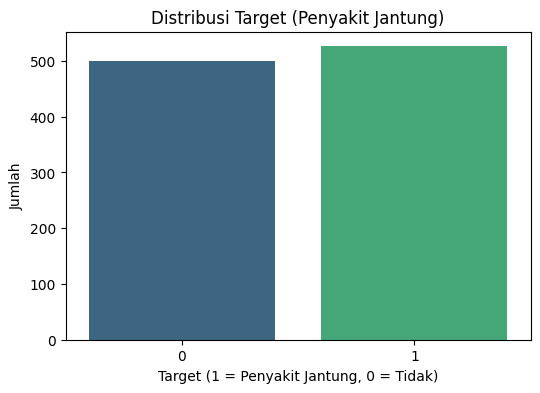

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistik Deskriptif
print("Statistik Deskriptif Dataset:\n")
print(heart_data.describe())

# 2. Visualisasi Distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data, palette='viridis')
plt.title('Distribusi Target (Penyakit Jantung)')
plt.xlabel('Target (1 = Penyakit Jantung, 0 = Tidak)')
plt.ylabel('Jumlah')
plt.show()


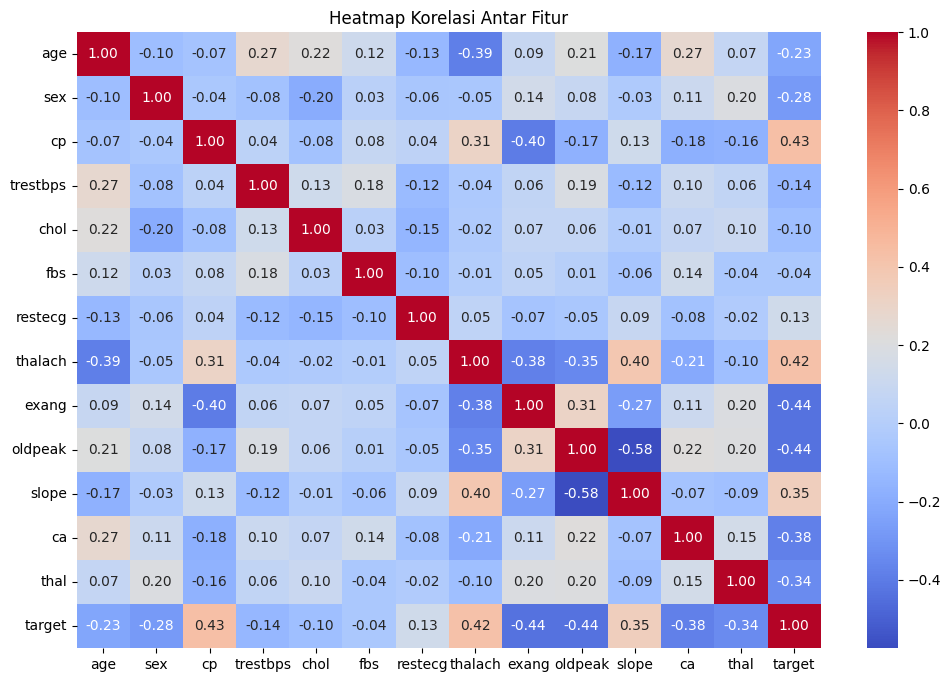

In [16]:
# 3. Korelasi Antar Fitur
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

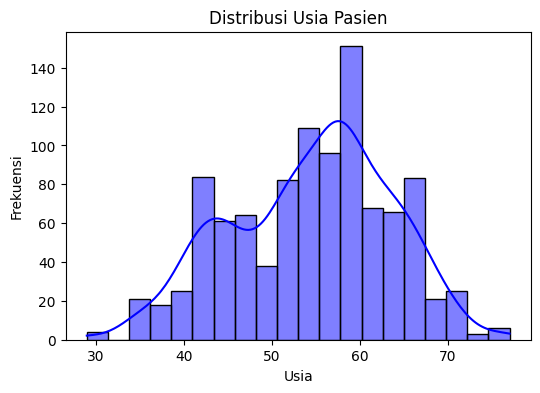

<ipython-input-17-4aa45c3ed8e8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=heart_data, palette='coolwarm')


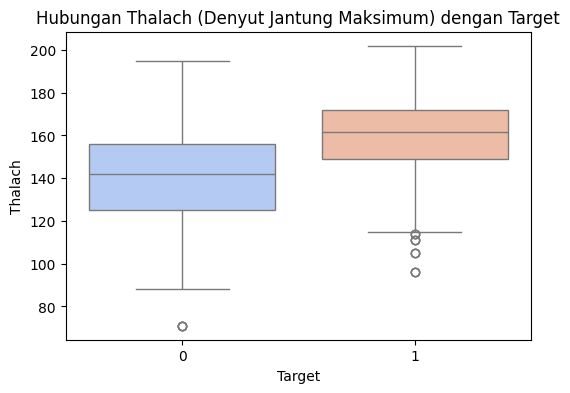

In [17]:
# 4. Distribusi Fitur Penting
# Contoh: Distribusi usia
plt.figure(figsize=(6, 4))
sns.histplot(heart_data['age'], kde=True, bins=20, color='blue')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Contoh: Hubungan antara denyut jantung maksimum dan target
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=heart_data, palette='coolwarm')
plt.title('Hubungan Thalach (Denyut Jantung Maksimum) dengan Target')
plt.xlabel('Target')
plt.ylabel('Thalach')
plt.show()

SELEKSI FITUR

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model dasar
model = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=8)  # Pilih 8 fitur terbaik
rfe.fit(X, y)

# Fitur yang dipilih
selected_features = X.columns[rfe.support_]
print("Fitur Terpilih:\n", selected_features)


Fitur Terpilih:
 Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


MELAKUKAN MODELING NEURAL NETWORKS

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Dataset dengan fitur terpilih
X_selected = heart_data[selected_features]
y = heart_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Arsitektur Neural Networks
model_nn = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output biner (0/1)
])

# Kompilasi model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model_nn.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                       epochs=50, batch_size=16, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5319 - loss: 0.7238 - val_accuracy: 0.5805 - val_loss: 0.6452
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.6414 - val_accuracy: 0.7268 - val_loss: 0.5878
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.5992 - val_accuracy: 0.7707 - val_loss: 0.5434
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.5577 - val_accuracy: 0.7902 - val_loss: 0.5076
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.5023 - val_accuracy: 0.8146 - val_loss: 0.4754
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.4941 - val_accuracy: 0.8293 - val_loss: 0.4493
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4734 - val_accuracy: 0.8341 - val_loss: 0.4312
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4494 - val_accuracy: 0.8488 - val_loss: 0.4173
Epo

Evaluasi Model

In [9]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Prediksi probabilitas dan kelas pada data testing
y_pred_prob = model_nn.predict(X_test_scaled)  # Probabilitas
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Konversi ke kelas (0/1)

# 1. Evaluasi Akurasi, Precision, Recall, dan F1-Score
print("Classification Report:\n")
print(classification_report(y_test, y_pred_class))

# 2. Evaluasi Akurasi Secara Terpisah
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# 3. Evaluasi AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       100
           1       0.83      0.91      0.87       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205

Accuracy: 0.86
AUC Score: 0.94


In [10]:
print(y_pred_class)

[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [11]:
print(y_test)

756    0
353    1
929    0
129    1
591    0
      ..
378    0
218    0
564    0
426    1
904    1
Name: target, Length: 205, dtype: int64
